In [ ]:
# 그래프 시각화 한글 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 코드 실행 후 런타임 다시 시작 --> 해당 셀 제외하고 코드 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import datetime
import scipy.stats

%matplotlib inline
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

# loan_user import

In [ ]:
loan_user = pd.read_csv('/content/drive/MyDrive/빅콘테스트/join_done.csv')

In [ ]:
loan_user.shape

(13519860, 27)

In [ ]:
loan_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519860 entries, 0 to 13519859
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   application_id           int64  
 1   loanapply_insert_time    object 
 2   bank_id                  int64  
 3   product_id               int64  
 4   loan_limit               float64
 5   loan_rate                float64
 6   is_applied               float64
 7   user_id                  float64
 8   gender                   float64
 9   credit_score             float64
 10  yearly_income            float64
 11  desired_amount           float64
 12  existing_loan_cnt        float64
 13  existing_loan_amt        float64
 14  age                      float64
 15  avg_loan_limit           float64
 16  avg_loan_rate            float64
 17  insert_time              object 
 18  insert_day               float64
 19  age_group                float64
 20  income_type              object 
 21  employ

In [ ]:
loan_user.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,credit_score,...,insert_time,insert_day,age_group,income_type,employment_type,houseown_type,purpose,personal_rehabilitation,insert_month,insert_weekend
0,1,2022-05-06 11:05:42,59,150,19000000.0,17.7,0.0,777860.0,1.0,580.0,...,2022-05-06 11:05:42,6.0,30.0,EARNEDINCOME,정규직,전월세,대환대출,3.0,5.0,0.0
1,1,2022-05-06 11:05:43,38,223,19000000.0,17.1,0.0,777860.0,1.0,580.0,...,2022-05-06 11:05:42,6.0,30.0,EARNEDINCOME,정규직,전월세,대환대출,3.0,5.0,0.0
2,1,2022-05-06 11:05:43,50,142,18000000.0,19.9,0.0,777860.0,1.0,580.0,...,2022-05-06 11:05:42,6.0,30.0,EARNEDINCOME,정규직,전월세,대환대출,3.0,5.0,0.0
3,1,2022-05-06 11:05:44,37,206,32000000.0,18.9,0.0,777860.0,1.0,580.0,...,2022-05-06 11:05:42,6.0,30.0,EARNEDINCOME,정규직,전월세,대환대출,3.0,5.0,0.0
4,1,2022-05-06 11:05:56,38,16,19000000.0,17.1,0.0,777860.0,1.0,580.0,...,2022-05-06 11:05:42,6.0,30.0,EARNEDINCOME,정규직,전월세,대환대출,3.0,5.0,0.0


In [ ]:
loan_user.isnull().sum()

application_id                   0
loanapply_insert_time            0
bank_id                          0
product_id                       0
loan_limit                       0
loan_rate                        0
is_applied                 3255482
user_id                          0
gender                           0
credit_score                     0
yearly_income                    0
desired_amount                   0
existing_loan_cnt                0
existing_loan_amt                0
age                              0
avg_loan_limit                   0
avg_loan_rate                    0
insert_time                      0
insert_day                       0
age_group                        0
income_type                      0
employment_type                  0
houseown_type                    0
purpose                          0
personal_rehabilitation          0
insert_month                     0
insert_weekend                   0
dtype: int64

# train test split

In [ ]:
train_loan_user = loan_user[~loan_user['is_applied'].isnull()]
test_loan_user = loan_user[loan_user['is_applied'].isnull()]

In [ ]:
train_loan_user.to_csv('/content/drive/MyDrive/빅콘테스트/COLAB/이지원/train_loan_user.csv', index=False)

In [ ]:
test_loan_user.to_csv('/content/drive/MyDrive/빅콘테스트/COLAB/이지원/test_loan_user.csv', index=False)

In [ ]:
print(train_loan_user.shape)
print(test_loan_user.shape)

(10264378, 27)
(3255482, 27)


# is_applied 0 vs 1

In [ ]:
train_loan_user = pd.read_csv('/content/drive/MyDrive/빅콘테스트/COLAB/이지원/train_loan_user.csv')

In [ ]:
train0 = train_loan_user[train_loan_user['is_applied']==0]
train1 = train_loan_user[train_loan_user['is_applied']==1]

In [ ]:
print(train0.shape)
print(train1.shape)

(7591617, 27)
(464692, 27)


In [ ]:
train_loan_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10259408 entries, 0 to 10264377
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   application_id           int64  
 1   loanapply_insert_time    object 
 2   bank_id                  int64  
 3   product_id               int64  
 4   loan_limit               float64
 5   loan_rate                float64
 6   is_applied               float64
 7   user_id                  float64
 8   gender                   float64
 9   credit_score             float64
 10  yearly_income            float64
 11  desired_amount           float64
 12  existing_loan_cnt        float64
 13  existing_loan_amt        float64
 14  age                      float64
 15  avg_loan_limit           float64
 16  avg_loan_rate            float64
 17  insert_time              object 
 18  insert_day               float64
 19  age_group                float64
 20  income_type              object 
 21  employ

### 일변수 - numeric

#### loan_limit

In [ ]:
train_loan_user['loan_limit'].describe()

count    1.025941e+07
mean     2.261924e+07
std      2.230727e+07
min      1.000000e+06
25%      9.000000e+06
50%      1.800000e+07
75%      3.300000e+07
max      1.000000e+10
Name: loan_limit, dtype: float64

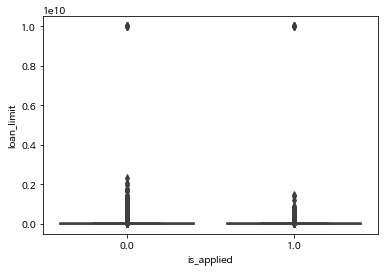

In [ ]:
sns.boxplot(x = 'is_applied', y = 'loan_limit', data = train_loan_user)

[Text(0.5, 1.0, '대출O')]

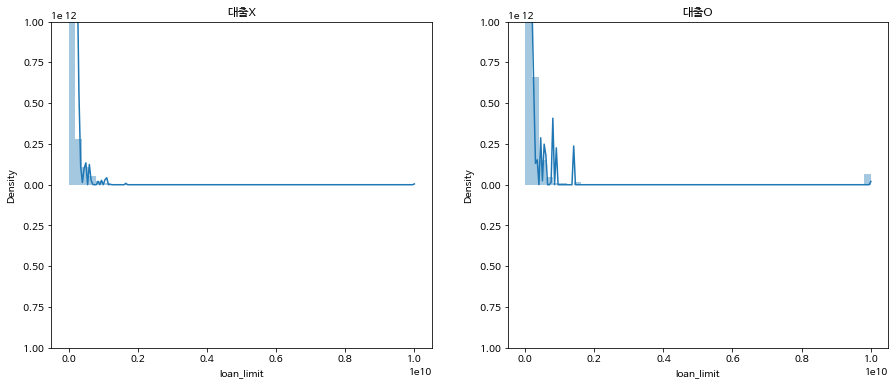

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(train0['loan_limit'], ax=ax[0]).set(title='대출X')
sns.distplot(train1['loan_limit'], ax=ax[1]).set(title='대출O')

**log변환을 해보자**    
[log변환에서 log1p를 사용하는 이유](https://suppppppp.github.io/posts/Why-Series-MDM-1/)

In [ ]:
log_test = train_loan_user[['loan_limit', 'is_applied']]
log_test['log_loan_limit'] = np.log1p(log_test['loan_limit'])

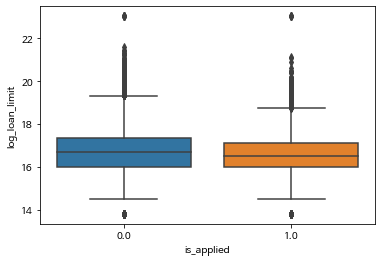

In [ ]:
sns.boxplot(x = 'is_applied', y = 'log_loan_limit', data = log_test)

[Text(0.5, 1.0, '대출O')]

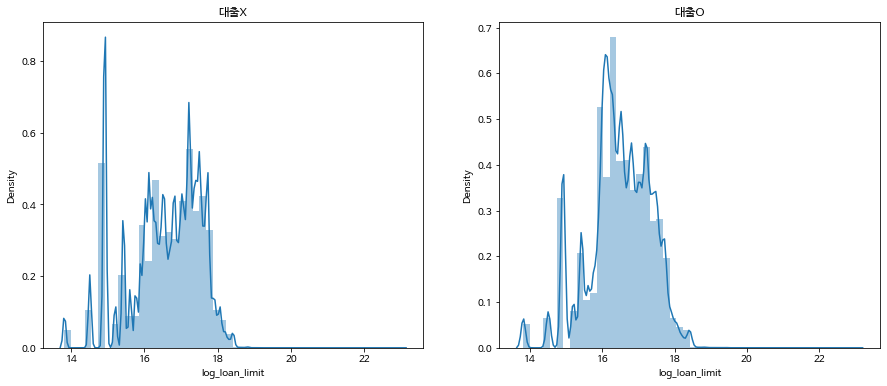

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(log_test[log_test['is_applied']==0]['log_loan_limit'], ax=ax[0]).set(title='대출X')
sns.distplot(log_test[log_test['is_applied']==1]['log_loan_limit'], ax=ax[1]).set(title='대출O')

In [ ]:
pd.concat([train0['loan_limit'].describe(), train1['loan_limit'].describe()], axis=1, keys=['대출X', '대출O'])

,대출X,대출O
count,9.704860e+06,5.545480e+05
mean,2.277624e+07,1.987168e+07
std,2.090904e+07,3.933355e+07
min,1.000000e+06,1.000000e+06
25%,9.000000e+06,9.000000e+06
50%,1.800000e+07,1.500000e+07
75%,3.400000e+07,2.700000e+07
max,1.000000e+10,1.000000e+10


- 대출 안 받은 집단의 승인한도가 받은 집단보다 미세하게 더 높은 경향

In [ ]:
scipy.stats.ttest_ind(np.log1p(train0['loan_limit']), np.log1p(train1['loan_limit']), equal_var=False)

Ttest_indResult(statistic=73.17792885518305, pvalue=0.0)

#### loan_rate

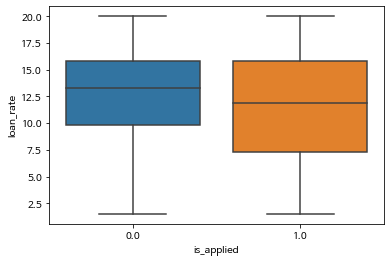

In [ ]:
sns.boxplot(x = 'is_applied', y = 'loan_rate', data = train_loan_user)

- 대출받는 집단이 대출 안 받는 집단보다 승인한도 대체적으로 더 작음
- 승인한도가 작을수록 대출받을 확률 증가

In [ ]:
scipy.stats.ttest_ind(train0['loan_rate'], train1['loan_rate'], equal_var=False)

Ttest_indResult(statistic=144.486085790009, pvalue=0.0)

#### credit_score

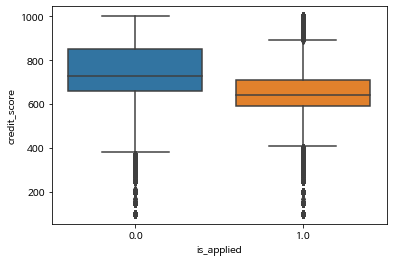

In [ ]:
sns.boxplot(x = 'is_applied', y = 'credit_score', data = train_loan_user)

[Text(0.5, 1.0, '대출O')]

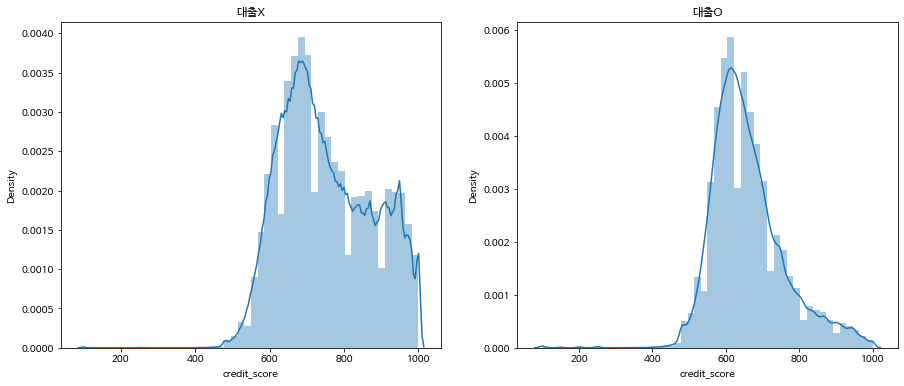

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(train0['credit_score'], ax=ax[0]).set(title='대출X')
sns.distplot(train1['credit_score'], ax=ax[1]).set(title='대출O')

In [ ]:
scipy.stats.ttest_ind(train0['credit_score'], train1['credit_score'], equal_var=False)

Ttest_indResult(statistic=667.9077385535143, pvalue=0.0)

- 신용점수가 800점 이상인 사람들의 분포를 보면 대출을 받은 사람보다 안 받은 사람이 훨씬 많음

In [ ]:
test = train_loan_user[['credit_score', 'is_applied']]
bins = [0, 400, 500, 600, 700, 800, 900, 1000]
bins_label = [str(x)+"미만" for x in bins]

test['credit_level'] = pd.cut(test['credit_score'], bins, right=False, labels=bins_label[1:])

In [ ]:
# 신용점수 구간별 대출유무별 신용점수
result = pd.pivot_table(test, index='credit_level', columns='is_applied', values='credit_score', aggfunc='count')

In [ ]:
result[0] = result[0]/sum(result[0])
result[1] = result[1]/sum(result[1])

In [ ]:
result

is_applied,0.0,1.0
credit_level,,
400미만,0.000287,0.001708
500미만,0.002340,0.012309
600미만,0.075746,0.242646
700미만,0.311555,0.458161
800미만,0.268187,0.185679
900미만,0.178826,0.067419
1000미만,0.163059,0.032078


- 신용점수 700이상부터는 대출신청안한 사람의 비율이 월등히 높다
- 신용점수 600이하부터는 대출신청한 사람의 비율이 월등히 높다

#### yearly_income

In [ ]:
train_loan_user['yearly_income'].describe()

count    1.026438e+07
mean     4.792392e+07
std      1.318979e+08
min      0.000000e+00
25%      2.900000e+07
50%      3.600000e+07
75%      5.000000e+07
max      1.000000e+10
Name: yearly_income, dtype: float64

In [ ]:
train_loan_user[train_loan_user['yearly_income']==0]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,gender,credit_score,...,insert_time,insert_day,age_group,income_type,employment_type,houseown_type,purpose,personal_rehabilitation,insert_month,insert_weekend
6002,976,2022-05-16 14:49:15,14,197,4000000.0,13.9,0.0,609353.0,1.0,690.0,...,2022-05-16 14:49:14,16.0,20.0,OTHERINCOME,기타,기타가족소유,생활비,3.0,5.0,0.0
6003,976,2022-05-16 14:49:15,13,123,3000000.0,17.5,0.0,609353.0,1.0,690.0,...,2022-05-16 14:49:14,16.0,20.0,OTHERINCOME,기타,기타가족소유,생활비,3.0,5.0,0.0
6004,976,2022-05-16 14:49:15,35,29,5000000.0,16.8,1.0,609353.0,1.0,690.0,...,2022-05-16 14:49:14,16.0,20.0,OTHERINCOME,기타,기타가족소유,생활비,3.0,5.0,0.0
6404,1072,2022-05-02 16:52:45,57,71,16000000.0,12.9,0.0,1020.0,1.0,710.0,...,2022-05-02 16:52:44,2.0,30.0,OTHERINCOME,기타,자가,대환대출,3.0,5.0,0.0
6405,1072,2022-05-02 16:52:45,35,29,5000000.0,14.5,0.0,1020.0,1.0,710.0,...,2022-05-02 16:52:44,2.0,30.0,OTHERINCOME,기타,자가,대환대출,3.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519355,2167749,2022-03-03 11:16:14,42,249,8000000.0,10.9,0.0,751923.0,0.0,910.0,...,2022-03-03 11:16:13,3.0,30.0,OTHERINCOME,기타,전월세,생활비,3.0,3.0,0.0
13519356,2167749,2022-03-03 11:16:14,57,71,20000000.0,13.9,0.0,751923.0,0.0,910.0,...,2022-03-03 11:16:13,3.0,30.0,OTHERINCOME,기타,전월세,생활비,3.0,3.0,0.0
13519357,2167749,2022-03-03 11:16:15,34,215,30000000.0,14.9,0.0,751923.0,0.0,910.0,...,2022-03-03 11:16:13,3.0,30.0,OTHERINCOME,기타,전월세,생활비,3.0,3.0,0.0
13519358,2167749,2022-03-03 11:16:15,3,152,30000000.0,15.9,0.0,751923.0,0.0,910.0,...,2022-03-03 11:16:13,3.0,30.0,OTHERINCOME,기타,전월세,생활비,3.0,3.0,0.0


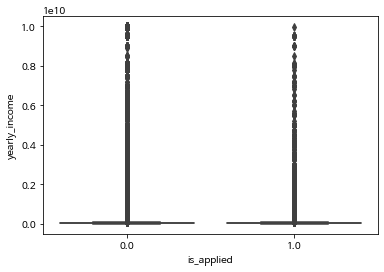

In [ ]:
sns.boxplot(x = 'is_applied', y = 'yearly_income', data = train_loan_user)

[Text(0.5, 1.0, '대출O')]

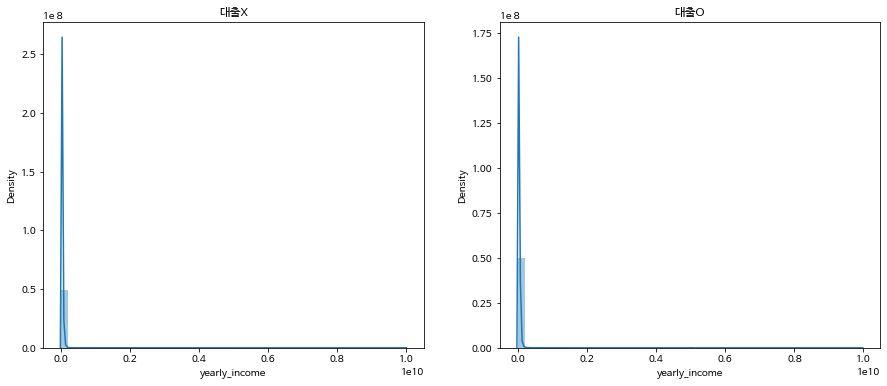

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(train0['yearly_income'], ax=ax[0]).set(title='대출X')
sns.distplot(train1['yearly_income'], ax=ax[1]).set(title='대출O')

**log 변환 고고**

In [ ]:
log_test = train_loan_user[['yearly_income', 'is_applied']]
log_test['log_yearly_income'] = np.log1p(log_test['yearly_income'])

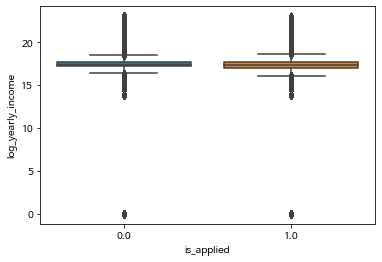

In [ ]:
sns.boxplot(x = 'is_applied', y = 'log_yearly_income', data = log_test)

[Text(0.5, 1.0, '대출O')]

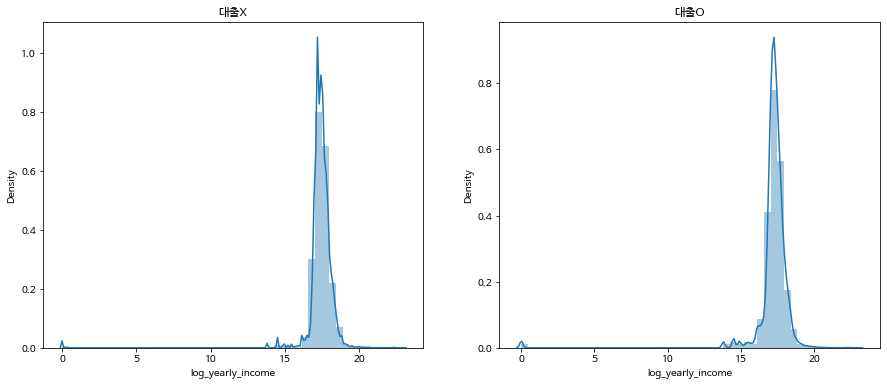

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(log_test[log_test['is_applied']==0]['log_yearly_income'], ax=ax[0]).set(title='대출X')
sns.distplot(log_test[log_test['is_applied']==1]['log_yearly_income'], ax=ax[1]).set(title='대출O')

In [ ]:
pd.concat([train0['yearly_income'].describe(), train1['yearly_income'].describe()], axis=1, keys=['대출X', '대출O'])

,대출X,대출O
count,9.704860e+06,5.545480e+05
mean,4.811655e+07,4.457772e+07
std,1.314922e+08,1.385139e+08
min,0.000000e+00,0.000000e+00
25%,2.900000e+07,2.500000e+07
50%,3.600000e+07,3.400000e+07
75%,5.000000e+07,4.700000e+07
max,1.000000e+10,9.950000e+09


- yearly_income 대출유무에 따라 차이 있음

In [ ]:
scipy.stats.ttest_ind(np.log1p(train0['yearly_income']), np.log1p(train1['yearly_income']), equal_var=False)

Ttest_indResult(statistic=92.95388205132468, pvalue=0.0)

#### desired_amount

In [ ]:
train_loan_user['desired_amount'].describe()

count    1.025941e+07
mean     5.161797e+07
std      2.324048e+08
min      0.000000e+00
25%      1.000000e+07
50%      2.800000e+07
75%      5.000000e+07
max      1.000000e+10
Name: desired_amount, dtype: float64

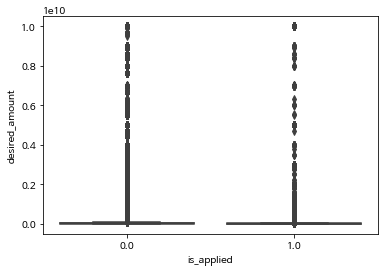

In [ ]:
sns.boxplot(x = 'is_applied', y = 'desired_amount', data = train_loan_user)

- log 쓰자

In [ ]:
log_test = train_loan_user[['desired_amount', 'is_applied']]
log_test['log_desired_amount'] = np.log1p(log_test['desired_amount'])

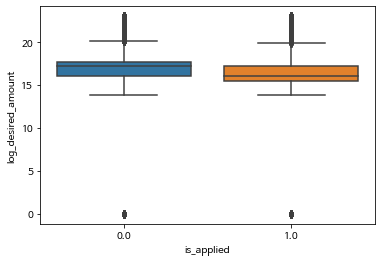

In [ ]:
sns.boxplot(x = 'is_applied', y = 'log_desired_amount', data = log_test)

[Text(0.5, 1.0, '대출O')]

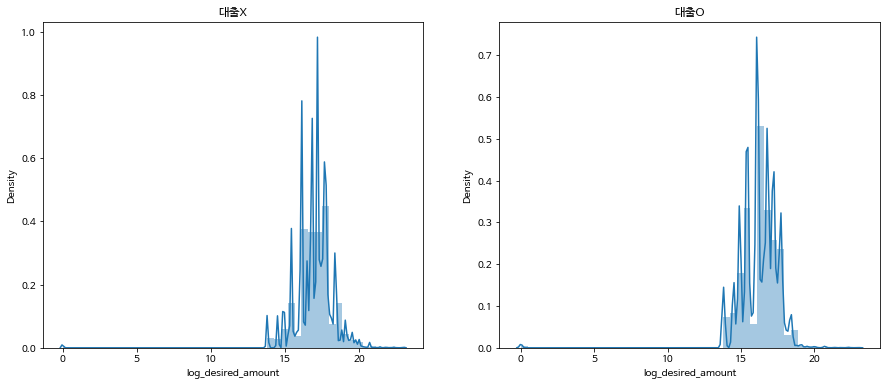

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(log_test[log_test['is_applied']==0]['log_desired_amount'], ax=ax[0]).set(title='대출X')
sns.distplot(log_test[log_test['is_applied']==1]['log_desired_amount'], ax=ax[1]).set(title='대출O')

In [ ]:
pd.concat([train0['desired_amount'].describe(), train1['desired_amount'].describe()], axis=1, keys=['대출X', '대출O'])

,대출X,대출O
count,9.704860e+06,5.545480e+05
mean,5.311118e+07,2.548610e+07
std,2.355136e+08,1.668322e+08
min,0.000000e+00,0.000000e+00
25%,1.000000e+07,5.000000e+06
50%,3.000000e+07,1.000000e+07
75%,5.000000e+07,3.000000e+07
max,1.000000e+10,1.000000e+10


In [ ]:
scipy.stats.ttest_ind(np.log1p(train0['desired_amount']), np.log1p(train1['desired_amount']), equal_var=False)

Ttest_indResult(statistic=395.5139939363424, pvalue=0.0)

- 대출받은 사람들의 desired_amount가 대출 받지 않은 사람보다 작다

#### existing_loan_cnt

In [ ]:
train_loan_user['existing_loan_cnt'].describe()

count    1.025941e+07
mean     2.882348e+00
std      3.162627e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.780000e+02
Name: existing_loan_cnt, dtype: float64

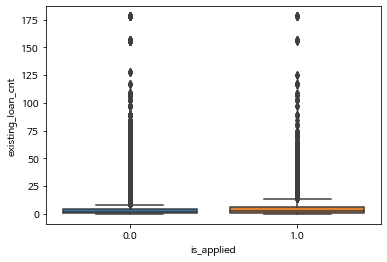

In [ ]:
sns.boxplot(x = 'is_applied', y = 'existing_loan_cnt', data = train_loan_user)

- log 쓰자

In [ ]:
log_test = train_loan_user[['existing_loan_cnt', 'is_applied']]
log_test['log_existing_loan_cnt'] = np.log1p(log_test['existing_loan_cnt'])

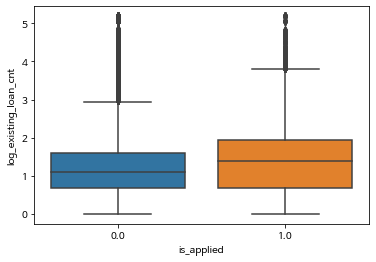

In [ ]:
sns.boxplot(x = 'is_applied', y = 'log_existing_loan_cnt', data = log_test)

[Text(0.5, 1.0, '대출O')]

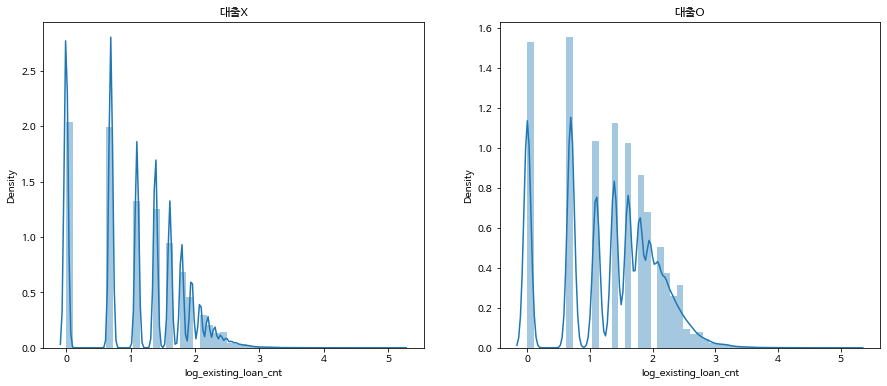

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(log_test[log_test['is_applied']==0]['log_existing_loan_cnt'], ax=ax[0]).set(title='대출X')
sns.distplot(log_test[log_test['is_applied']==1]['log_existing_loan_cnt'], ax=ax[1]).set(title='대출O')

In [ ]:
pd.concat([train0['existing_loan_cnt'].describe(), train1['existing_loan_cnt'].describe()], axis=1, keys=['대출X', '대출O'])

,대출X,대출O
count,9.704860e+06,554548.000000
mean,2.823039e+00,3.920286
std,3.083896e+00,4.179708
min,0.000000e+00,0.000000
25%,1.000000e+00,1.000000
50%,2.000000e+00,3.000000
75%,4.000000e+00,6.000000
max,1.780000e+02,178.000000


In [ ]:
scipy.stats.ttest_ind(np.log1p(train0['existing_loan_cnt']), np.log1p(train1['existing_loan_cnt']), equal_var=False)

Ttest_indResult(statistic=-211.02383803643104, pvalue=0.0)

- 대출받은 집단이 안 받은 집단보다 기대출 수 평균적으로 약 1개 더 많음

#### existing_loan_amt

In [ ]:
train_loan_user = train_loan_user[train_loan_user['existing_loan_amt']>0]

In [ ]:
train_loan_user['existing_loan_amt'].describe()

count    8.056309e+06
mean     8.023622e+07
std      9.281503e+07
min      1.000000e+06
25%      2.800000e+07
50%      5.700000e+07
75%      8.800000e+07
max      3.164000e+09
Name: existing_loan_amt, dtype: float64

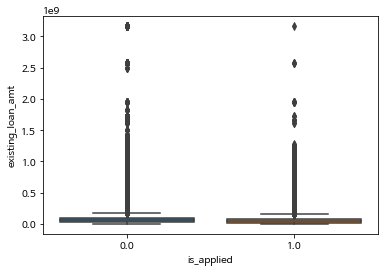

In [ ]:
sns.boxplot(x = 'is_applied', y = 'existing_loan_amt', data = train_loan_user)

- log 쓰자

In [ ]:
log_test = train_loan_user[['existing_loan_amt', 'is_applied']]
log_test['log_existing_loan_amt'] = np.log1p(log_test['existing_loan_amt'])

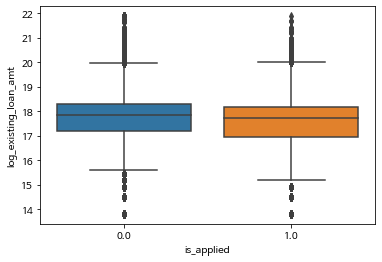

In [ ]:
sns.boxplot(x = 'is_applied', y = 'log_existing_loan_amt', data = log_test)

[Text(0.5, 1.0, '대출O')]

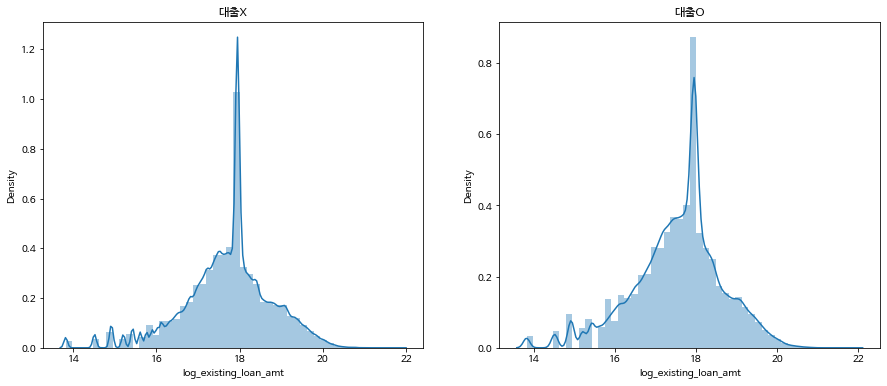

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

sns.distplot(log_test[log_test['is_applied']==0]['log_existing_loan_amt'], ax=ax[0]).set(title='대출X')
sns.distplot(log_test[log_test['is_applied']==1]['log_existing_loan_amt'], ax=ax[1]).set(title='대출O')

In [ ]:
pd.concat([train0['existing_loan_amt'].describe(), train1['existing_loan_amt'].describe()], axis=1, keys=['대출X', '대출O'])

,대출X,대출O
count,7.591617e+06,4.646920e+05
mean,8.076947e+07,7.152455e+07
std,9.312672e+07,8.710490e+07
min,1.000000e+06,1.000000e+06
25%,2.900000e+07,2.300000e+07
50%,5.700000e+07,4.900000e+07
75%,8.800000e+07,7.800000e+07
max,3.164000e+09,3.164000e+09


In [ ]:
scipy.stats.ttest_ind(np.log1p(train0['existing_loan_amt']), np.log1p(train1['existing_loan_amt']), equal_var=False)

Ttest_indResult(statistic=98.84415539898453, pvalue=0.0)

- 대출받은 집단이 안 받은 집단보다 기대출 금액 더 적음

### 일변수 - categorical

#### bank_id

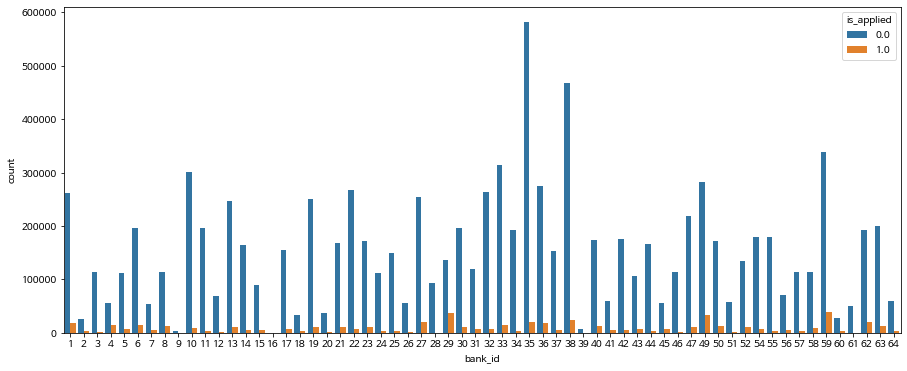

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='bank_id', data=train_loan_user, hue='is_applied')

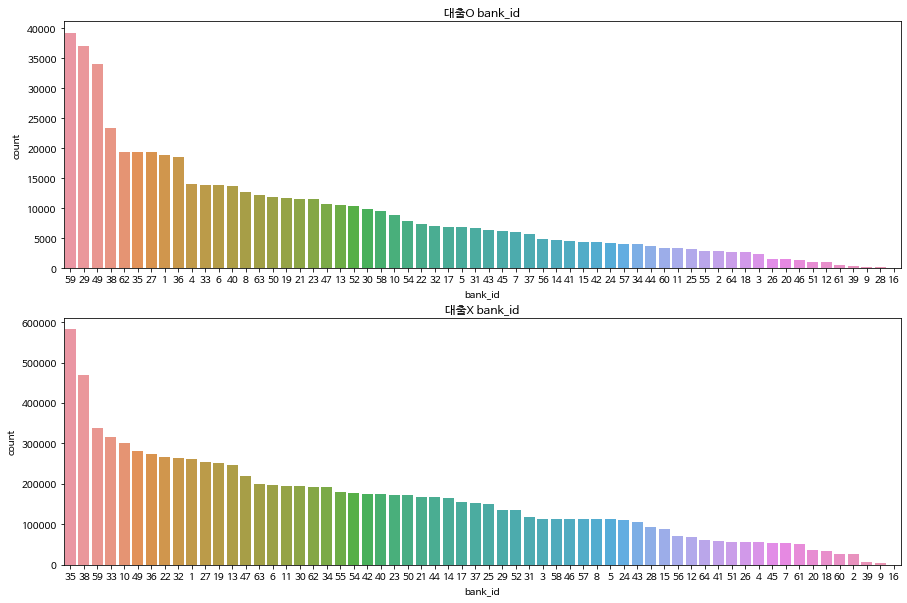

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

sns.countplot(ax=axes[0], x='bank_id', data=train1, order=train1['bank_id'].value_counts().index).set(title='대출O bank_id')

sns.countplot(ax=axes[1], x='bank_id', data=train0, order=train0['bank_id'].value_counts().index).set(title='대출X bank_id')

plt.show()

- 대출을 받은 고객이 많이 선택한 은행과 대출을 받지 않은 고객이 많이 선택한 은행의 count를 비율화하여 score을 계산해 bank 관련 파생변수 생성

In [ ]:
bank_score = pd.DataFrame(index=set(train_loan_user['bank_id']))
bank_score = pd.merge(bank_score, train1['bank_id'].value_counts()/sum(train1['bank_id'].value_counts()), left_index=True, right_index=True)
bank_score = pd.merge(bank_score, train0['bank_id'].value_counts()/sum(train0['bank_id'].value_counts()), left_index=True, right_index=True)

In [ ]:
# index = bank_id
bank_score.columns=['대출O', '대출X']
bank_score

,대출O,대출X
1,0.034075,0.026892
2,0.005190,0.002742
3,0.004166,0.011773
4,0.025480,0.005839
5,0.012329,0.011552
...,...,...
60,0.006230,0.002798
61,0.000985,0.005252
62,0.034996,0.019880
63,0.022168,0.020661


#### product_id

In [ ]:
print(len(train_loan_user[['application_id', 'bank_id', 'product_id']].drop_duplicates()))
print(train_loan_user.shape)
# 중복이 있네?

10259107
(10259408, 27)


In [ ]:
sample = train_loan_user[['application_id', 'loanapply_insert_time', 'bank_id', 'product_id', 'loan_limit', 'loan_rate', 'is_applied', 'user_id', 'insert_time']]
dp = sample.duplicated(['application_id', 'bank_id', 'product_id'], keep=False) # application_id, bank_id, product_id가 중복인경우
t = pd.concat([sample, dp], axis=1)
t[t[0]]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,insert_time,0
12679,2814,2022-03-06 01:38:06,10,65,52000000.0,12.2,1.0,751858.0,2022-03-06 01:38:06,True
12681,2814,2022-03-06 01:38:06,10,65,52000000.0,12.2,0.0,751858.0,2022-03-06 01:38:06,True
94163,19647,2022-04-05 11:24:23,35,107,4000000.0,17.1,1.0,10288.0,2022-04-05 11:24:23,True
94164,19647,2022-04-05 11:24:34,35,107,3000000.0,14.8,1.0,10288.0,2022-04-05 11:24:23,True
193230,40479,2022-03-03 08:40:30,35,98,29000000.0,19.1,1.0,809469.0,2022-03-03 08:40:29,True
...,...,...,...,...,...,...,...,...,...,...
10091923,2130997,2022-05-25 10:59:14,10,65,43000000.0,12.4,1.0,254217.0,2022-05-25 10:59:14,True
10124087,2137871,2022-03-29 10:31:18,10,65,26000000.0,12.2,1.0,837479.0,2022-03-29 10:31:17,True
10124092,2137871,2022-03-29 10:31:18,10,65,33000000.0,12.2,0.0,837479.0,2022-03-29 10:31:17,True
10180403,2150068,2022-03-24 11:45:15,35,96,41000000.0,11.8,0.0,677799.0,2022-03-24 11:44:56,True


- 한 신청서 안에서 같은 은행, 같은 상품이 다른 승인한도와 다른 승인금리로 여러번 추천될 수도 있나보다

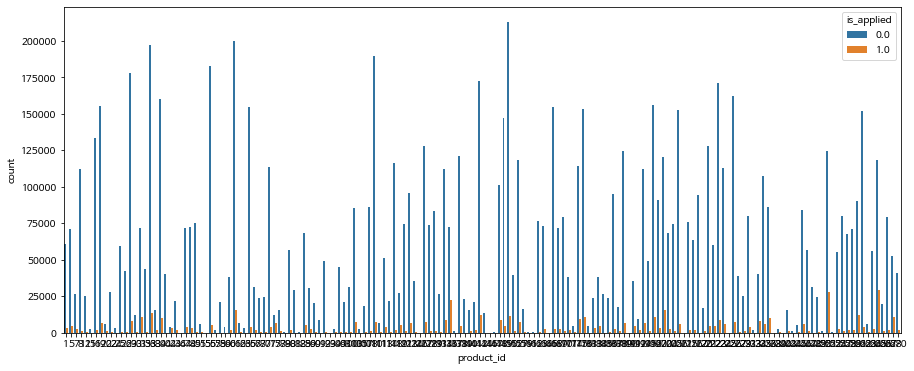

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='product_id', data=train_loan_user, hue='is_applied')

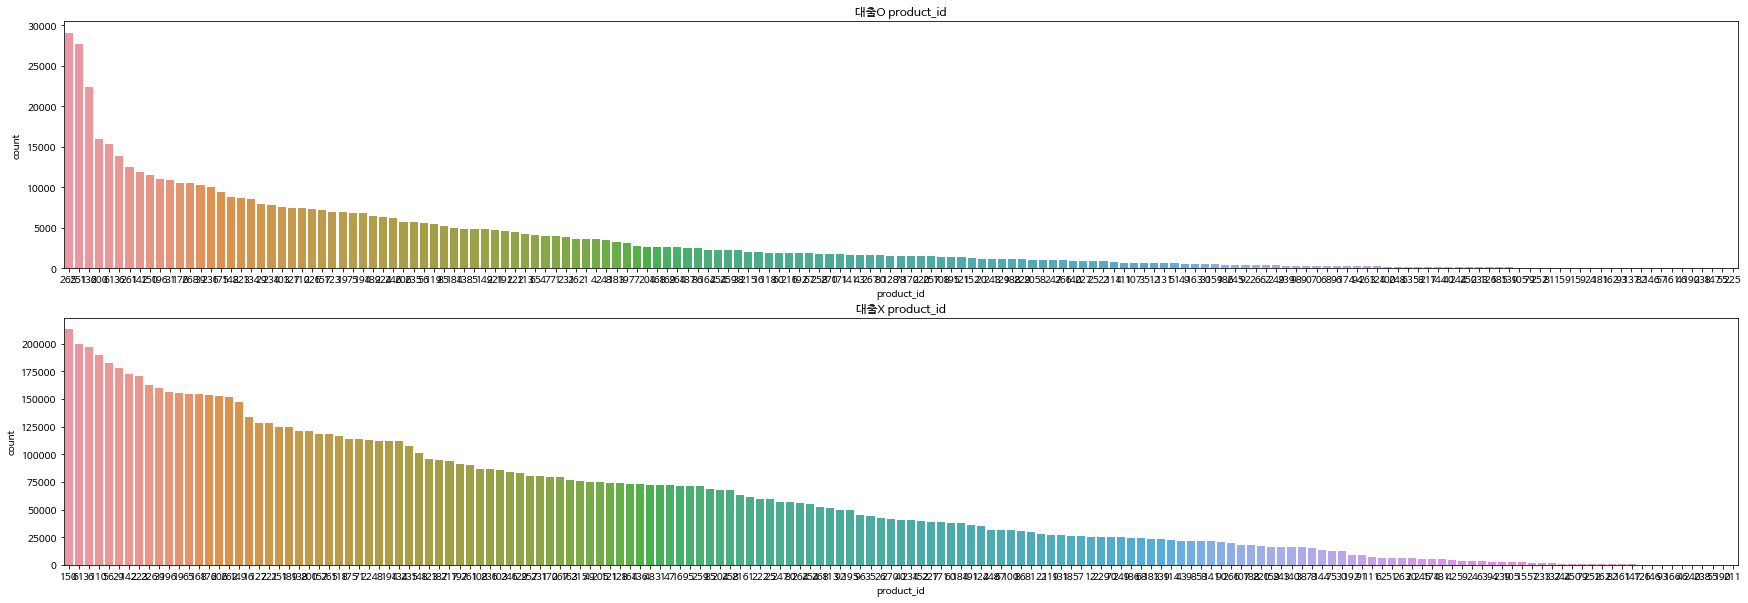

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

sns.countplot(ax=axes[0], x='product_id', data=train1, order=train1['product_id'].value_counts().index).set(title='대출O product_id')
sns.countplot(ax=axes[1], x='product_id', data=train0, order=train0['product_id'].value_counts().index).set(title='대출X product_id')

plt.show()

In [ ]:
product_score = pd.DataFrame(index=set(train_loan_user['product_id']))
product_score = pd.merge(product_score, train1['product_id'].value_counts()/sum(train1['product_id'].value_counts()), left_index=True, right_index=True, how='left')
product_score = pd.merge(product_score, train0['product_id'].value_counts()/sum(train0['product_id'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = product_id
product_score.columns=['대출O', '대출X']
product_score

,대출O,대출X
1,0.006485,0.006297
5,0.008827,0.007349
7,0.004927,0.002715
8,0.001870,0.011563
12,0.001127,0.002579
...,...,...
265,0.052416,0.012182
266,0.001805,0.002056
267,0.002950,0.008184
268,0.019039,0.005405


#### birth_year, age, age_group

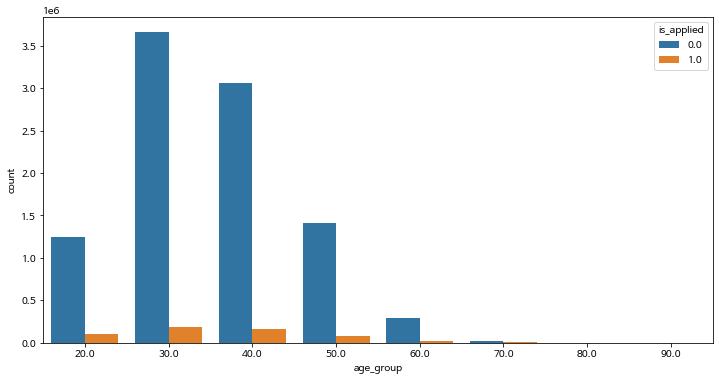

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', data=train_loan_user, hue='is_applied')

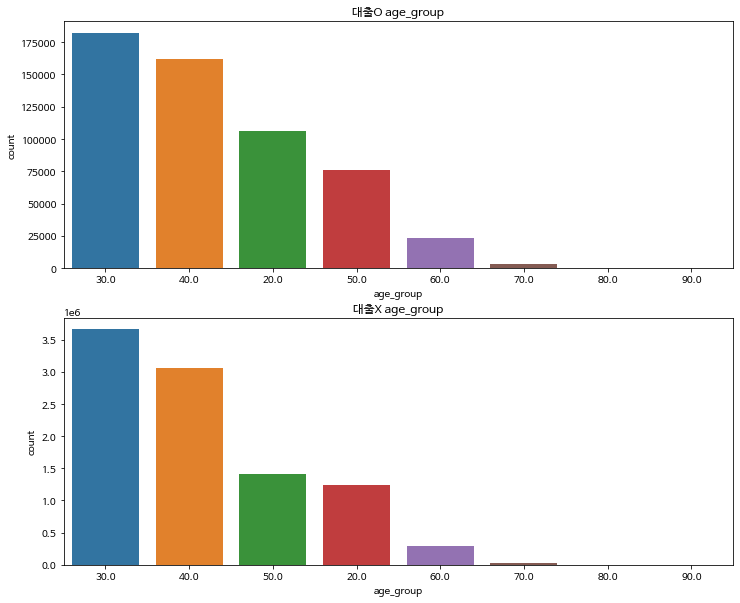

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(ax=axes[0], x='age_group', data=train1, order=train1['age_group'].value_counts().index).set(title='대출O age_group')
sns.countplot(ax=axes[1], x='age_group', data=train0, order=train0['age_group'].value_counts().index).set(title='대출X age_group')

plt.show()

- 20대 : 신청한 사람 대비 대출 신청 받은 사람이 많음
- 50대 : 신청한 사람 대비 대출 신청 안 받은 사람이 많음

In [ ]:
age_score = pd.DataFrame(index=sorted(train_loan_user['age_group'].unique()))
age_score = pd.merge(age_score, train1['age_group'].value_counts()/sum(train1['age_group'].value_counts()), left_index=True, right_index=True, how='left')
age_score = pd.merge(age_score, train0['age_group'].value_counts()/sum(train0['age_group'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = age_group
age_score.columns=['대출O', '대출X']
age_score

,대출O,대출X
20.0,0.192216,0.128293
30.0,0.328437,0.377085
40.0,0.291587,0.315404
50.0,0.137663,0.145944
60.0,0.042559,0.030661
70.0,0.006636,0.002454
80.0,0.000880,0.000153
90.0,0.000022,0.000005


#### gender

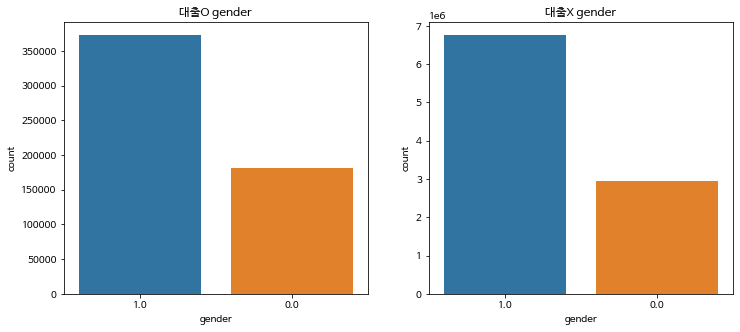

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], x='gender', data=train1, order=train1['gender'].value_counts().index).set(title='대출O gender')
sns.countplot(ax=axes[1], x='gender', data=train0, order=train0['gender'].value_counts().index).set(title='대출X gender')

plt.show()

In [ ]:
gender_score = pd.DataFrame(index=[0.0, 1.0])
gender_score = pd.merge(gender_score, train1['gender'].value_counts()/sum(train1['gender'].value_counts()), left_index=True, right_index=True, how='left')
gender_score = pd.merge(gender_score, train0['gender'].value_counts()/sum(train0['gender'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
gender_score.columns=['대출O', '대출X']
gender_score.index = pd.Series(['여자', '남자'])
gender_score

,대출O,대출X
여자,0.327104,0.30287
남자,0.672896,0.69713


- 비율적으로 대출을 받은 여성 비율이 안 받은 여성 비율보다 더 높으나 성별이 대출 유무에 큰 영향을 끼치는 것 같진 않음

#### income_type

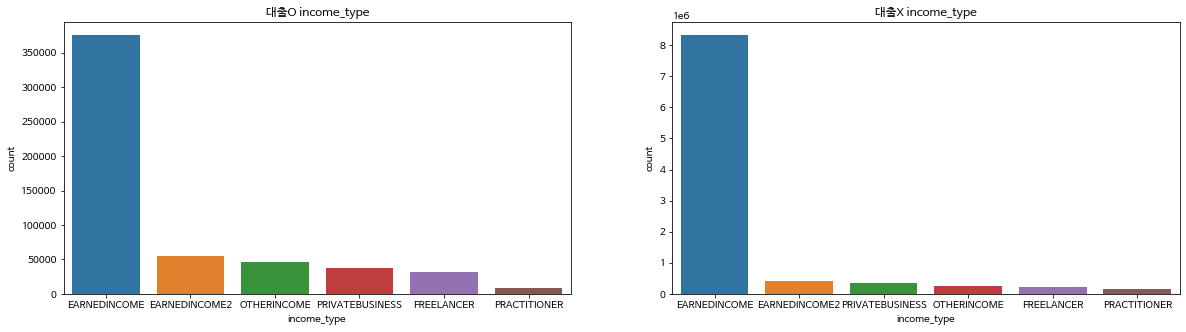

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.countplot(ax=axes[0], x='income_type', data=train1, order=train1['income_type'].value_counts().index).set(title='대출O income_type')
sns.countplot(ax=axes[1], x='income_type', data=train0, order=train0['income_type'].value_counts().index).set(title='대출X income_type')

plt.show()

In [ ]:
income_type_score = pd.DataFrame(index=train_loan_user['income_type'].unique())
income_type_score = pd.merge(income_type_score, train1['income_type'].value_counts()/sum(train1['income_type'].value_counts()), left_index=True, right_index=True, how='left')
income_type_score = pd.merge(income_type_score, train0['income_type'].value_counts()/sum(train0['income_type'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = income_type
income_type_score.columns=['대출O', '대출X']
income_type_score

,대출O,대출X
EARNEDINCOME,0.677905,0.858698
PRIVATEBUSINESS,0.066690,0.034391
OTHERINCOME,0.083001,0.026611
EARNEDINCOME2,0.100287,0.042795
FREELANCER,0.056740,0.022244
PRACTITIONER,0.015376,0.015261


#### employment_type

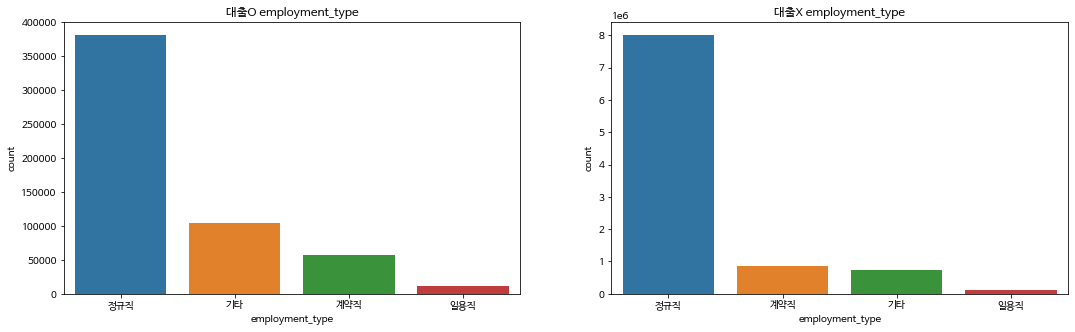

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.countplot(ax=axes[0], x='employment_type', data=train1, order=train1['employment_type'].value_counts().index).set(title='대출O employment_type')
sns.countplot(ax=axes[1], x='employment_type', data=train0, order=train0['employment_type'].value_counts().index).set(title='대출X employment_type')

plt.show()

In [ ]:
employment_type_score = pd.DataFrame(index=set(train_loan_user['employment_type']))
employment_type_score = pd.merge(employment_type_score, train1['employment_type'].value_counts()/sum(train1['employment_type'].value_counts()), left_index=True, right_index=True, how='left')
employment_type_score = pd.merge(employment_type_score, train0['employment_type'].value_counts()/sum(train0['employment_type'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = employment_type
employment_type_score.columns=['대출O', '대출X']
employment_type_score

,대출O,대출X
기타,0.186927,0.074499
계약직,0.103374,0.087073
일용직,0.021628,0.013018
정규직,0.688070,0.825410


- 대출받은 사람은 정규직 다음으로 기타가 많음
- 대출 받지 않은 사람은 정규직 다음으로 계약직이 많음

#### houseown_type

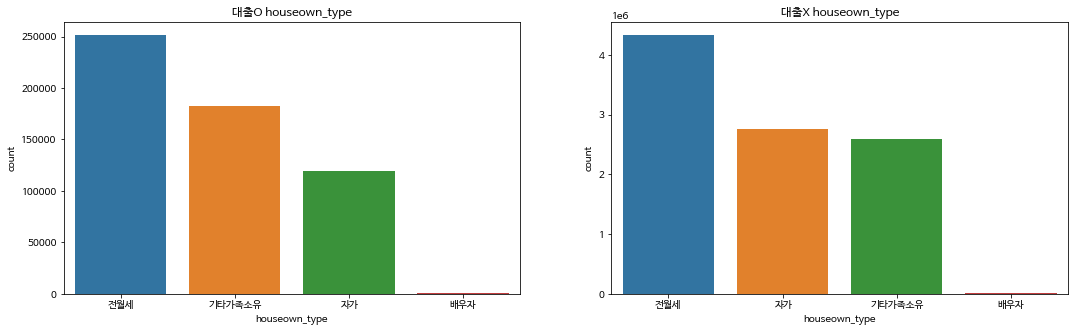

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.countplot(ax=axes[0], x='houseown_type', data=train1, order=train1['houseown_type'].value_counts().index).set(title='대출O houseown_type')
sns.countplot(ax=axes[1], x='houseown_type', data=train0, order=train0['houseown_type'].value_counts().index).set(title='대출X houseown_type')

plt.show()

In [ ]:
houseown_type_score = pd.DataFrame(index=set(train_loan_user['houseown_type']))
houseown_type_score = pd.merge(houseown_type_score, train1['houseown_type'].value_counts()/sum(train1['houseown_type'].value_counts()), left_index=True, right_index=True, how='left')
houseown_type_score = pd.merge(houseown_type_score, train0['houseown_type'].value_counts()/sum(train0['houseown_type'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = houseown_type
houseown_type_score.columns=['대출O', '대출X']
houseown_type_score

,대출O,대출X
기타가족소유,0.329528,0.268025
전월세,0.453629,0.447022
자가,0.216005,0.283739
배우자,0.000839,0.001214


- 옹 대출유무에 따른 houseown_type 차이 존재!

#### purpose

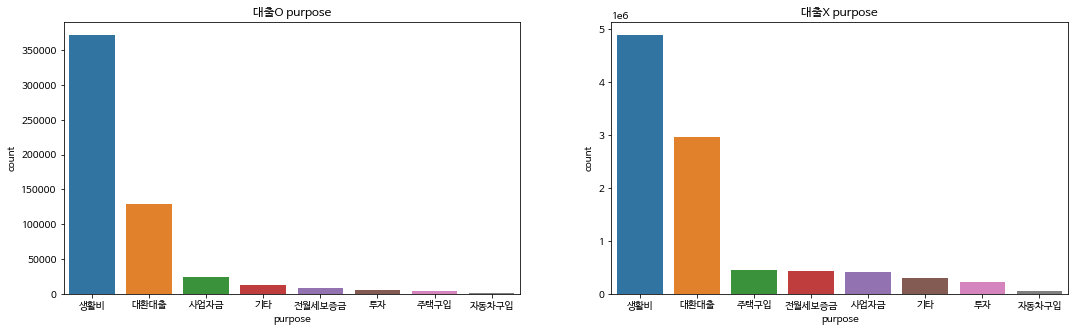

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.countplot(ax=axes[0], x='purpose', data=train1, order=train1['purpose'].value_counts().index).set(title='대출O purpose')
sns.countplot(ax=axes[1], x='purpose', data=train0, order=train0['purpose'].value_counts().index).set(title='대출X purpose')

plt.show()

In [ ]:
purpose_score = pd.DataFrame(index=set(train_loan_user['purpose']))
purpose_score = pd.merge(purpose_score, train1['purpose'].value_counts()/sum(train1['purpose'].value_counts()), left_index=True, right_index=True, how='left')
purpose_score = pd.merge(purpose_score, train0['purpose'].value_counts()/sum(train0['purpose'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = purpose
purpose_score.columns=['대출O', '대출X']
purpose_score

,대출O,대출X
대환대출,0.231935,0.305853
기타,0.022544,0.030761
자동차구입,0.002503,0.005884
주택구입,0.006286,0.045393
전월세보증금,0.013741,0.044804
투자,0.009748,0.022448
사업자금,0.042404,0.041485
생활비,0.670838,0.503372


- 대출O : 사업자금, 기타, 전월세보증금, 투자, 주택구입
- 대출X : 주택구입, 전월세보증금, 사업자금, 기타, 투자

#### personal_rehabilitation_yn

In [ ]:
train_loan_user['personal_rehabilitation'].isnull().sum()

0

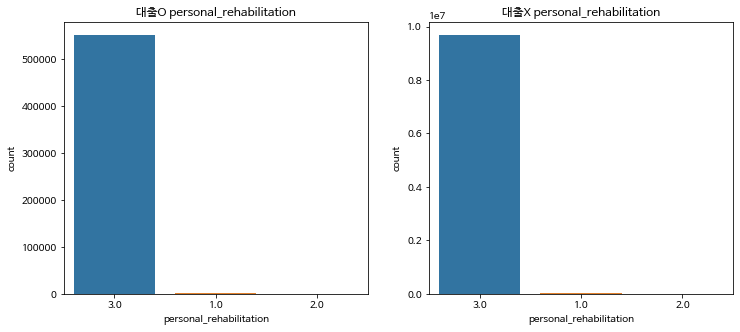

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax=axes[0], x='personal_rehabilitation', data=train1, order=train1['personal_rehabilitation'].value_counts().index).set(title='대출O personal_rehabilitation')
sns.countplot(ax=axes[1], x='personal_rehabilitation', data=train0, order=train0['personal_rehabilitation'].value_counts().index).set(title='대출X personal_rehabilitation')

plt.show()

In [ ]:
personal_rehabilitation_score = pd.DataFrame(index=set(train_loan_user['personal_rehabilitation']))
personal_rehabilitation_score = pd.merge(personal_rehabilitation_score, train1['personal_rehabilitation'].value_counts()/sum(train1['personal_rehabilitation'].value_counts()), left_index=True, right_index=True, how='left')
personal_rehabilitation_score = pd.merge(personal_rehabilitation_score, train0['personal_rehabilitation'].value_counts()/sum(train0['personal_rehabilitation'].value_counts()), left_index=True, right_index=True, how='left')

In [ ]:
# index = personal_rehabilitation
personal_rehabilitation_score.columns=['대출O', '대출X']
personal_rehabilitation_score

,대출O,대출X
1.0,0.004054,0.001717
2.0,0.000548,0.000390
3.0,0.995398,0.997892


- 1 : 현재 개인회생자인 경우
- 2 : 과거에 개인회생 경험 있지만 납입 완료한 경우
- 3 : 개인회생 경험 자체가 없는 경우
